# Explore Nucleation Rates
See how nucleation rates change as a function of temperature.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd
import numpy as np
import json

## Load Results
Each of the result folders in [the void tracking directory](../1_void-tracking) are named after the temperature and contain a file which contains the void growth and mobility functions.

In [2]:
dynamics_terms = []
for path in Path('../1_void-tracking/output/').glob('8bitTIFF-*/rate-parameters-bayesian.json'):
    # Get the temperature
    temperature = float(path.parent.name.split("-")[-1][:-1])  # Directories are named [...]-[temp]C
    terms = {'temp': temperature}
    
    # Load the model parameters
    params = json.loads(path.read_text())
    
    # Make means their own columns
    terms.update(dict(zip(params['order'], params['mean'])))
    
    # Store the covariance, but also put in the standard deviations
    terms.update(dict(zip(
        [x + "-std" for x in params['order']], 
        np.sqrt(np.diag(params['covariance']))
    )))
    terms['covariance'] = params['covariance']
    
    dynamics_terms.append(terms)
dynamics_terms = pd.DataFrame(dynamics_terms).sort_values('temp')

In [3]:
dynamics_terms

,temp,nucleation_rate,dissolution_prob,nucleation_rate-std,dissolution_prob-std,covariance
0,525.0,0.854792,0.024627,0.031659,0.000912,"[[0.0010023129780325434, -1.0637300126429373e-..."
4,550.0,0.060517,0.020657,0.008186,0.002805,"[[6.701505547872338e-05, 1.1078121973108314e-0..."
2,575.0,0.553834,0.034410,0.024916,0.001546,"[[0.0006207881723455867, -1.1233126846911152e-..."
5,600.0,0.191711,0.012211,0.014391,0.000921,"[[0.00020709052059100273, -9.94867695464228e-0..."
3,625.0,0.829397,0.011191,0.031481,0.000423,"[[0.0009910828092320567, 2.1450306657498894e-1..."
1,650.0,0.216491,0.015294,0.012412,0.000869,"[[0.0001540567308369067, 6.754527425135786e-08..."


## Plot the Effect of Temperature on Growth
See if there is a consistent trend

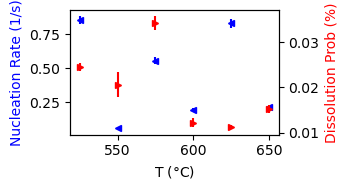

In [4]:
fig, ax = plt.subplots(figsize=(3.5, 2.))

ax.errorbar(dynamics_terms['temp'], dynamics_terms['nucleation_rate'], yerr=dynamics_terms['nucleation_rate-std'], color='blue', fmt='<', ms=4)

ax2 = ax.twinx()
ax2.errorbar(dynamics_terms['temp'], dynamics_terms['dissolution_prob'], yerr=dynamics_terms['dissolution_prob-std'], color='red', fmt='>', ms=4)

ax.set_xlabel('T ($\\degree$C)')
ax.set_ylabel('Nucleation Rate (1/s)', color='blue')
ax2.set_ylabel('Dissolution Prob (%)', color='red')


fig.tight_layout()
fig.savefig('figures/nucleation-vs-temperature.png', dpi=320)